<a href="https://colab.research.google.com/github/nafisaljufri/dailyjournal/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression
- Pada tutorial kali ini, kita akan menggunakan sebuah dataset yang memiliki 2 features, yaitu horsepower dan price dari sebuah mobil
- Tujuan dari tutorial ini adalah memprediksi harga mobil jika mobil tersebut mempunyai horsepower sebesar 100, 150, dan 200
- Hipotesis awal : mobil dengan horsepower lebih tinggi harganya lebih mahal jika dibandingkan dengan yang horsepowernya lebih rendah.

### Load library

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Load datasets

In [10]:
#Nama dataframe kita adalah df yang berisi data dari data.csv
#Hanya menggunakan kolom horsepower dan price
df = pd.read_csv('data.csv', usecols=['horsepower', 'price'])

### Sneak peak data

In [11]:
#Melihat 5 baris teratas dari data
#Independent variabel(x) adalah horsepower
#Dependent variabel(y) adalah price
df.head()

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0


In [12]:
#Mengetahui jumlah kolom dan baris dari data
#Data kita mempunya 2 kolom dengan 200 baris
df.shape

(200, 2)

In [13]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  200 non-null    float64
 1   price       200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [14]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll
df.describe()

,horsepower,price
count,200.000000,200.000000
mean,103.320000,13230.375000
std,37.468615,7960.155239
min,48.000000,5118.000000
25%,70.000000,7775.000000
50%,95.000000,10320.000000
75%,116.000000,16500.750000
max,262.000000,45400.000000


### Handling Missing Values

In [15]:
#Mencari dan menangani missing values
#Ternyata data kita tidak ada missing values
df.isnull().sum()

,0
horsepower,0
price,0


### Exploratory Data Analysis (EDA)

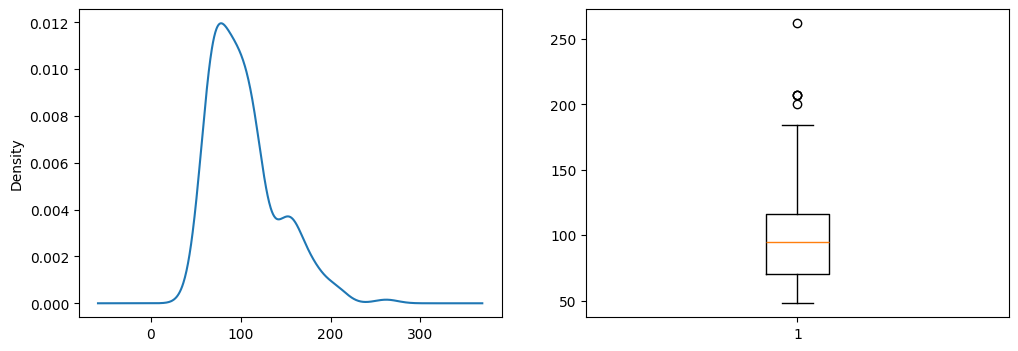

In [16]:
#Univariate analysis horsepower
#Melihat distribusi dari horsepower
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

- Dapat dilihat bahwa density dari horsepower paling tinggi di nilai 100.
- Distribusinya hampir mirip dengan distribusi normal namun persebaran data kurang merata (memiliki standard deviasi yang tinggi).

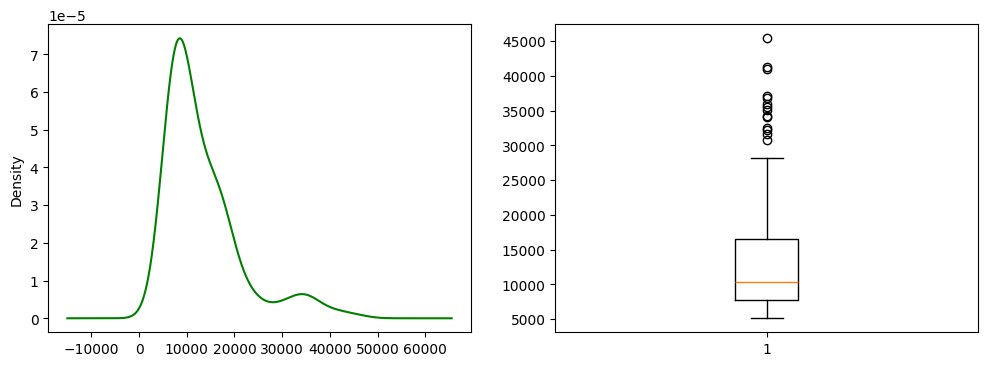

In [17]:
#Univariate analysis price
#Melihat distribusi dari price
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['price'].plot(kind='kde', c='g')

f.add_subplot(1,2,2)
plt.boxplot(df['price'])
plt.show()

- Density dari price paling tinggi di nilai 10000.
- Distribusinya hampir mirip dengan distribusi normal namun persebaran data kurang merata (memiliki standard deviasi yang tinggi).

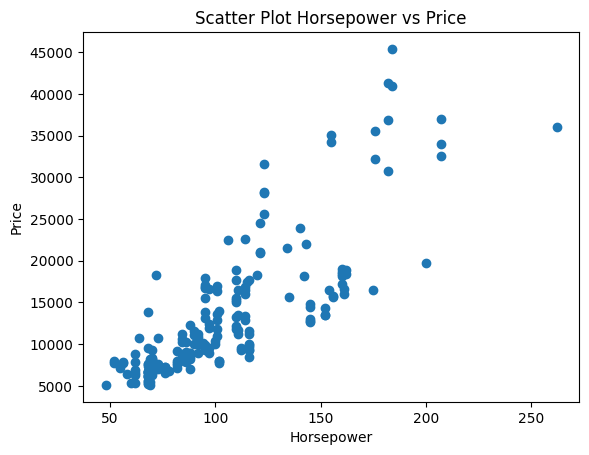

In [18]:
#Bivariate analysis horsepower dan price
#Menggunakan scatter plot
plt.scatter(df['horsepower'], df['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')
plt.show()

- Dari scatter plot dapat dilihat bahwa data memiliki korelasi positif yang cukup signifikan.
- Hal ini berarti dengan bertambahnya nilai dari horsepower maka nilai price pun akan bertambah

In [19]:
#Mengetahui nilai korelasi dari horsepower dan price
#Nilai korelasinya adalah 0.81 termasuk kategori sangat tinggi
df.corr()

,horsepower,price
horsepower,1.000000,0.811097
price,0.811097,1.000000


- Setelah kita tahu tentang karakteristik data kita, bisa dilanjutkan ke tahap modelling

### Modelling

In [20]:
#Recall data kita
df.head()

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0


In [21]:
#Pertama, buat variabel x dan y
x = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [22]:
#Kedua, kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [23]:
#Ketiga, kita bikin object linear regresi
lin_reg = LinearRegression()

In [24]:
#Keempat, train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression()

In [25]:
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[186.00685771]]
[-5619.32246475]


- dari nilai m dan b diatas, kalau dimasukan ke dalam rumus menjadi:
Y = 164.73x - 3903.39

In [26]:
#Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

0.5815954736576071

- Model kita mendapatkan accuracy score sebesar 78.68%

Text(0.5, 1.0, 'Plot Horsepower vs Price')

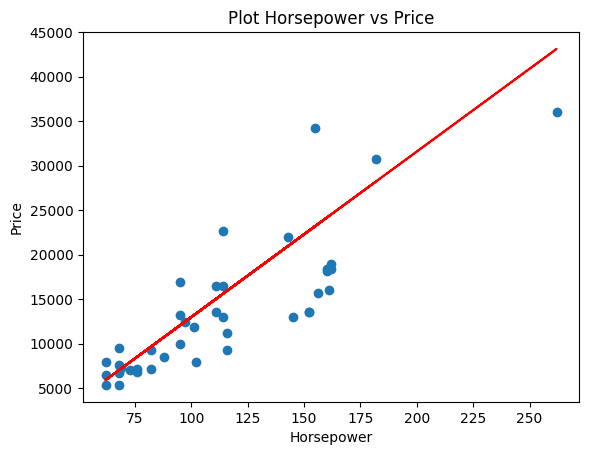

In [27]:
#Ketujuh, visualisasi aktual vs prediksi menggunakan data testing
#Garis merah merupakan garis regresi dari persamaan yang kita dapat tadi
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

### Prediction
- Yuk kita prediksi harga mobil ketika memiliki horsepower 100, 150, dan 200

In [28]:
#Prediksi harga mobil dengan horsepower 100
lin_reg.predict([[100]])

array([[12981.36330669]])

In [29]:
#Prediksi harga mobil dengan horsepower 150
lin_reg.predict([[150]])

array([[22281.70619241]])

In [30]:
#Prediksi harga mobil dengan horsepower 200
lin_reg.predict([[200]])

array([[31582.04907812]])

- dengan melihat prediksi harga diatas, didapatkan bahwa hipotesis awal kita memang benar yaitu mobil dengan Horsepower 200 memiliki harga yang lebih mahal daripada yang lain!